In [1]:
import warnings 

warnings.simplefilter(action='ignore', category=Warning)

import os
import tempfile
import scanpy as sc
import scvi
import seaborn as sns


import anndata as ad
import pandas as pd

In [2]:
adata = ad.read_h5ad("../RData/4_chandraker_seurat_complete-dataset_clustered_res0-4_O2.h5ad")
adata

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id', 'condition', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'seurat_clusters', 'study_clusters', 'cluster_name'
    var: 'names'
    obsm: 'X_harmony', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap'
    layers: 'counts_RNA'

In [3]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts_RNA",
    categorical_covariate_keys=["patient_id",
                                     "condition"],
)

In [4]:
model = scvi.model.SCVI(adata)

In [5]:
model.train(accelerator="cpu",
    devices=5
)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/5
Initializing distributed: GLOBAL_RANK: 2, MEMBER: 3/5
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/5
Initializing distributed: GLOBAL_RANK: 3, MEMBER: 4/5
Initializing distributed: GLOBAL_RANK: 4, MEMBER: 5/5
----------------------------------------------------------------------------------------------------
distributed_backend=gloo
All distributed processes registered. Starting with 5 processes
----------------------------------------------------------------------------------------------------



Epoch 1/267:   0%|                                                                                                                                                                                                                                   | 0/267 [00:00<?, ?it/s]

W1031 03:08:53.444000 2692428 site-packages/torch/multiprocessing/spawn.py:160] Terminating process 2692463 via signal SIGTERM
W1031 03:08:53.446000 2692428 site-packages/torch/multiprocessing/spawn.py:160] Terminating process 2692493 via signal SIGTERM
W1031 03:08:53.447000 2692428 site-packages/torch/multiprocessing/spawn.py:160] Terminating process 2692511 via signal SIGTERM
W1031 03:08:53.448000 2692428 site-packages/torch/multiprocessing/spawn.py:160] Terminating process 2692553 via signal SIGTERM
[rank: 0] Received SIGTERM: 15


ProcessRaisedException: 

-- Process 4 terminated with the following error:
Traceback (most recent call last):
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/multiprocessing/spawn.py", line 90, in _wrap
    fn(i, *args)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/launchers/multiprocessing.py", line 173, in _wrapping_function
    results = function(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/trainer/trainer.py", line 575, in _fit_impl
    self._run(model, ckpt_path=ckpt_path)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/trainer/trainer.py", line 982, in _run
    results = self._run_stage()
              ^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/trainer/trainer.py", line 1026, in _run_stage
    self.fit_loop.run()
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py", line 216, in run
    self.advance()
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py", line 455, in advance
    self.epoch_loop.run(self._data_fetcher)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/training_epoch_loop.py", line 150, in run
    self.advance(data_fetcher)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/training_epoch_loop.py", line 320, in advance
    batch_output = self.automatic_optimization.run(trainer.optimizers[0], batch_idx, kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/optimization/automatic.py", line 192, in run
    self._optimizer_step(batch_idx, closure)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/optimization/automatic.py", line 270, in _optimizer_step
    call._call_lightning_module_hook(
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/trainer/call.py", line 171, in _call_lightning_module_hook
    output = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/core/module.py", line 1302, in optimizer_step
    optimizer.step(closure=optimizer_closure)
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/core/optimizer.py", line 154, in step
    step_output = self._strategy.optimizer_step(self._optimizer, closure, **kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/ddp.py", line 270, in optimizer_step
    optimizer_output = super().optimizer_step(optimizer, closure, model, **kwargs)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/strategy.py", line 239, in optimizer_step
    return self.precision_plugin.optimizer_step(optimizer, model=model, closure=closure, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/plugins/precision/precision.py", line 123, in optimizer_step
    return optimizer.step(closure=closure, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/optim/optimizer.py", line 487, in wrapper
    out = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/optim/optimizer.py", line 91, in _use_grad
    ret = func(self, *args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/optim/adam.py", line 202, in step
    loss = closure()
           ^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/plugins/precision/precision.py", line 109, in _wrap_closure
    closure_result = closure()
                     ^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/optimization/automatic.py", line 146, in __call__
    self._result = self.closure(*args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/optimization/automatic.py", line 131, in closure
    step_output = self._step_fn()
                  ^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/loops/optimization/automatic.py", line 319, in _training_step
    training_step_output = call._call_strategy_hook(trainer, "training_step", *kwargs.values())
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/trainer/call.py", line 323, in _call_strategy_hook
    output = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/strategy.py", line 390, in training_step
    return self._forward_redirection(self.model, self.lightning_module, "training_step", *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/strategy.py", line 641, in __call__
    wrapper_output = wrapper_module(*args, **kwargs)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/parallel/distributed.py", line 1643, in forward
    else self._run_ddp_forward(*inputs, **kwargs)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/parallel/distributed.py", line 1459, in _run_ddp_forward
    return self.module(*inputs, **kwargs)  # type: ignore[index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/lightning/pytorch/strategies/strategy.py", line 634, in wrapped_forward
    out = method(*_args, **_kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/train/_trainingplans.py", line 364, in training_step
    _, _, scvi_loss = self.forward(batch, loss_kwargs=self.loss_kwargs)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/train/_trainingplans.py", line 294, in forward
    return self.module(
           ^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/module/base/_decorators.py", line 32, in auto_transfer_args
    return fn(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/module/base/_base_module.py", line 207, in forward
    return _generic_forward(
           ^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/module/base/_base_module.py", line 751, in _generic_forward
    generative_outputs = module.generative(**generative_inputs, **generative_kwargs)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/module/base/_decorators.py", line 32, in auto_transfer_args
    return fn(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/module/_vae.py", line 496, in generative
    px_scale, px_r, px_rate, px_dropout = self.decoder(
                                          ^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/nn/_base_components.py", line 415, in forward
    px = self.px_decoder(z, *cat_list)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ozkan.aydemir-umw/miniconda3/envs/scvi-12/lib/python3.12/site-packages/scvi/nn/_base_components.py", line 162, in forward
    one_hot_cat = nn.functional.one_hot(cat.squeeze(-1), n_cat)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Class values must be smaller than num_classes.


In [11]:
model_key = "scvi_model_pbmc_tutorial"
model_dir = os.path.join("models", model_key)
model.save(model_dir, overwrite=True)

In [12]:
SCVI_LATENT_KEY = "X_" + model_key

latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent
latent.shape

# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY, 
                key_added=model_key)

In [13]:
sc.tl.umap(adata,
           neighbors_key=model_key)

In [15]:
adata

AnnData object with n_obs × n_vars = 10434 × 33694
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'Cluster', 'CellType', 'Experiment', 'Method', 'percent.mt', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'unintegrated_clusters', 'scvi_clusters', 'harmony_clusters', '_scvi_batch', '_scvi_labels'
    var: 'names'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'scvi_model_pbmc_tutorial', 'umap', 'predicted.celltype.l1_colors', 'Method_colors'
    obsm: 'X_harmony', 'X_integrated.scvi', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap.harmony', 'X_umap.scvi', 'X_umap.unintegrated', '_scvi_extra_categorical_covs', 'X_scvi_model_pbmc_tutorial', 'X_umap'
    layers: 'counts_RNA'
    obsp: 'scvi_model_pbmc_tutorial_distances', 'scvi_model_pbmc_tutorial_connectivities'

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [18]:
SCVI_LATENT_KEY

'X_scvi_model_pbmc_tutorial'

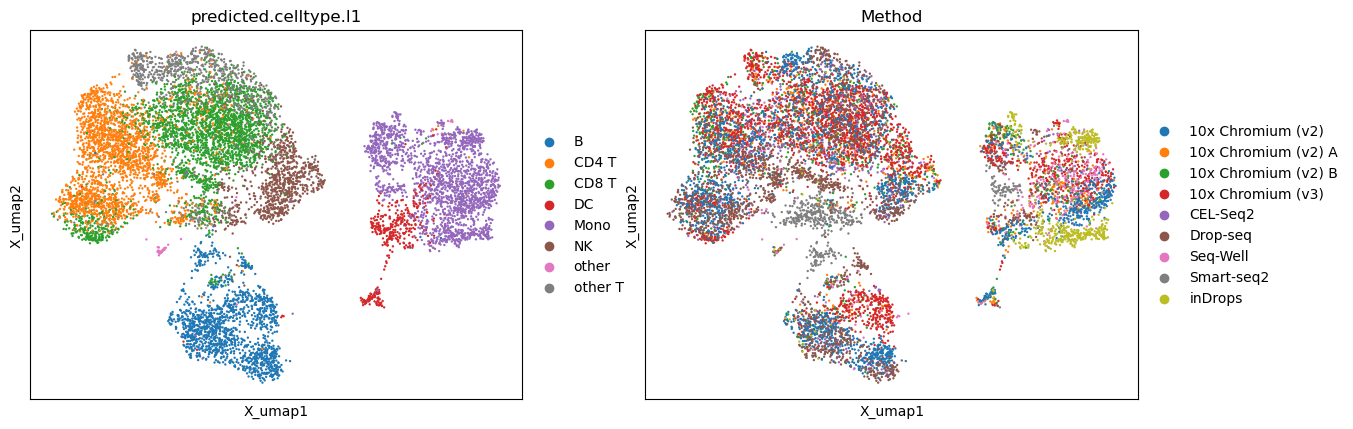

In [19]:
sc.pl.embedding(
    adata, basis="X_umap",
    color=["predicted.celltype.l1", "Method"],
    
)

In [20]:
for res in [0.2, 0.5, 1.0]:
    SCVI_CLUSTERS_KEY = "leiden_" + str(res) + model_key
    sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, 
                 resolution=res, neighbors_key=model_key)

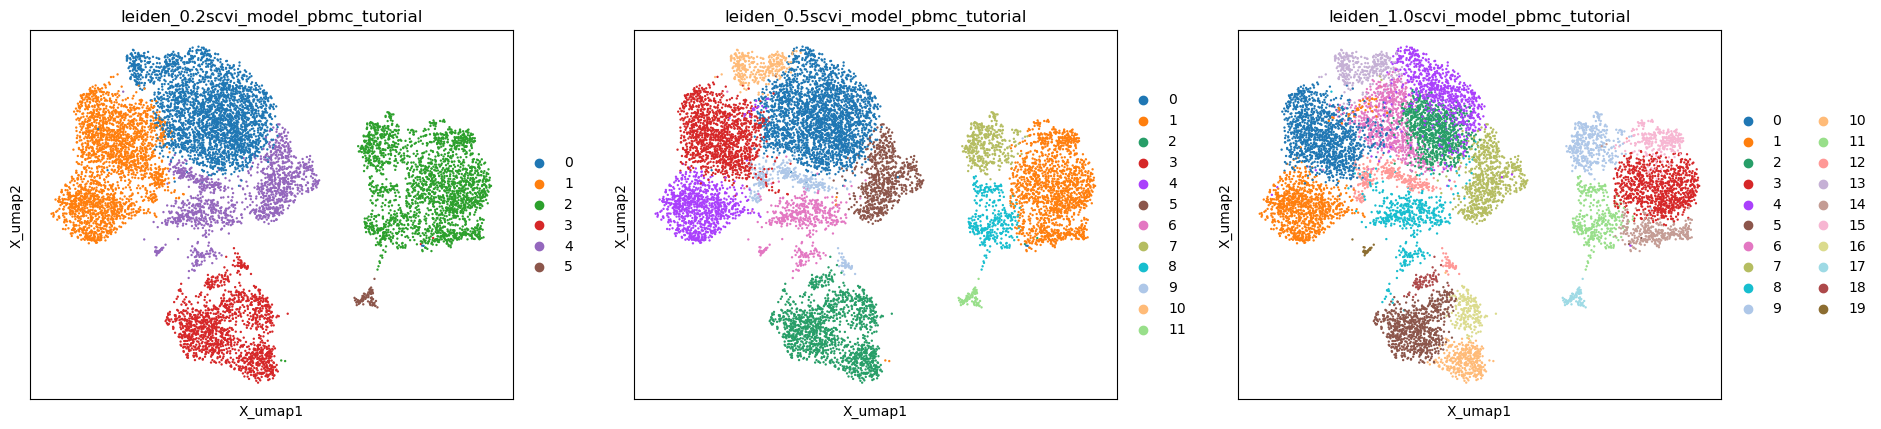

In [23]:
sc.pl.embedding(
    adata, basis="X_umap",
    color=["leiden_" + str(res) + model_key for res in [0.2, 0.5, 1.0]],
    
)